In [1]:
import os

# Anzeigen des aktuellen Arbeitsverzeichnisses
current_working_directory = os.getcwd()
print("Aktuelles Arbeitsverzeichnis:", current_working_directory)


Aktuelles Arbeitsverzeichnis: /Users/henrikfliegel/Desktop/Uni/SoSe24/MlClaas/ML-with-CLAAS


In [2]:
import pandas as pd

df = pd.read_excel('CLAAS_data/Option Take Rate_2023.XLSX')
df


,Material,UTyp,Jahr,PLand,Merkmal,MerkWert,S-Merkmal,S-Maschine,%-Anteil,Bezeich.Merkmalwert
0,20011530,113,2023,CRU,MD_B00,10,5,5,100,Generation 0
1,20011530,113,2023,CRU,MD_B06,60,5,5,100,Standard Antr.
2,20011530,113,2023,CRU,MD_B08,40,5,5,100,SW-Zylinder 2-Wege System
3,20011530,113,2023,CRU,MD_B10,170,5,5,100,V-Kanal CAC gesch Kette
4,20011530,113,2023,CRU,MD_B11,20,5,5,100,Kupplung normal
...,...,...,...,...,...,...,...,...,...,...
26194,20011550,846,2023,CCN,MD_T03,20,6,6,100,Maschine fahrbereit
26195,20011550,846,2023,CCN,MD_T03,190,6,6,100,Konservierung (?ersee)
26196,20011550,846,2023,CCN,MD_T03,410,6,6,100,ALR-Beleuchtung 2
26197,20011550,846,2023,CCN,MD_Z02,1147,6,6,100,822/122_CERIO 680


In [30]:
# Definiere die Liste der gewünschten Merkmale
gewünschte_merkmale = ['MD_P02', 'MD_N02', 'MD_N08', 'MD_N05', 'MD_B10', 'MD_G02']

# Filtere den DataFrame, um nur Zeilen mit den gewünschten Merkmalen zu behalten
filtered_df = df[df['Merkmal'].isin(gewünschte_merkmale)]

filtered_df = filtered_df.reset_index(drop=True)


# Überprüfe das Ergebnis
filtered_df

,Material,UTyp,Jahr,PLand,Merkmal,MerkWert,S-Merkmal,S-Maschine,%-Anteil,Bezeich.Merkmalwert
0,20011530,113,2023,CRU,MD_B10,170,5,5,100,V-Kanal CAC gesch Kette
1,20011530,113,2023,CRU,MD_G02,402,5,5,100,SC + STV Sm
2,20011530,113,2023,CRU,MD_N02,394,5,5,100,S1 10L
3,20011530,113,2023,CRU,MD_N08,803,5,5,100,LA S FIX 6L
4,20011530,113,2023,CRU,MD_P02,2006,5,5,100,QSB67 K R120-190 T3
...,...,...,...,...,...,...,...,...,...,...
1794,20011550,846,2023,CCN,MD_G02,405,6,6,100,SC HD U + STV Sm 1X6
1795,20011550,846,2023,CCN,MD_N02,622,6,6,100,M1 TT W EHS
1796,20011550,846,2023,CCN,MD_N05,114,6,6,100,TT 890 breit
1797,20011550,846,2023,CCN,MD_N08,920,6,6,100,LTA M VAR 8L


In [28]:
# Liste der gewünschten Merkmale
merkmale = ['MD_P02', 'MD_N02', 'MD_N08', 'MD_N05', 'MD_B10', 'MD_G02']

# Erstelle ein Wörterbuch, um die DataFrames für jedes Merkmal zu speichern
dfs = {}

total_count_m = 0 
total_count_m2 = 0

for merkmal in merkmale:
    # Filtere den DataFrame für das aktuelle Merkmal
    filtered_df = df[df['Merkmal'] == merkmal]
    
    # Setze den Index zurück
    filtered_df = filtered_df.reset_index(drop=True)
    
    # Speichere den DataFrame im Wörterbuch unter dem Schlüssel des Merkmals
    dfs[merkmal] = filtered_df

    # Zähle die Anzahl der Einträge mit einem %-Anteil unter 100
    count_under_100 = filtered_df[filtered_df['%-Anteil'] < 100].shape[0]
    total_count_mm = filtered_df.shape[0]  # Gesamtanzahl der Einträge für das Merkmal
    print(f'{merkmal}: {count_under_100} entries with %-Anteil under 100%, out of {total_count_mm} total entries')

    total_count_m += count_under_100 
    total_count_m2 += total_count_mm


print(f'Total: {total_count_m} entries with %-Anteil under 100%, out of {total_count_m2} total entries')

# Jetzt kannst du auf jeden DataFrame über das Wörterbuch zugreifen, z.B.:
dfs['MD_N02'] # Zeigt den DataFrame für das Merkmal 'P02'

MD_P02: 108 entries with %-Anteil under 100%, out of 281 total entries
MD_N02: 222 entries with %-Anteil under 100%, out of 365 total entries
MD_N08: 171 entries with %-Anteil under 100%, out of 321 total entries
MD_N05: 18 entries with %-Anteil under 100%, out of 56 total entries
MD_B10: 210 entries with %-Anteil under 100%, out of 356 total entries
MD_G02: 299 entries with %-Anteil under 100%, out of 420 total entries
Total: 1028 entries with %-Anteil under 100%, out of 1799 total entries


,Material,UTyp,Jahr,PLand,Merkmal,MerkWert,S-Merkmal,S-Maschine,%-Anteil,Bezeich.Merkmalwert
0,20011530,113,2023,CRU,MD_N02,394,5,5,100,S1 10L
1,20011530,113,2023,TW,MD_N02,394,1,1,100,S1 10L
2,20011530,113,2023,UZ,MD_N02,394,1,1,100,S1 10L
3,20011530,113,2023,XS,MD_N02,394,3,3,100,S1 10L
4,20011530,115,2023,AT,MD_N02,394,2,3,67,S1 10L
...,...,...,...,...,...,...,...,...,...,...
360,20011550,845,2023,IT,MD_N02,621,7,7,100,M1 TT EHS
361,20011550,845,2023,LV,MD_N02,621,1,1,100,M1 TT EHS
362,20011550,845,2023,RO,MD_N02,621,1,1,100,M1 TT EHS
363,20011550,845,2023,SE,MD_N02,621,1,1,100,M1 TT EHS


In [52]:
import pandas as pd

# Liste der gewünschten Merkmale
merkmale = ['MD_P02', 'MD_N02', 'MD_N08', 'MD_N05', 'MD_B10', 'MD_G02']

# Erstelle ein Wörterbuch, um die aggregierten Daten für jedes Merkmal zu speichern
percentage_distributions = {}
percentage_distributions_count = {}

for merkmal in merkmale:
    # Filtere den DataFrame für das aktuelle Merkmal
    filtered_df = df[df['Merkmal'] == merkmal]
    
    # Setze den Index zurück
    filtered_df = filtered_df.reset_index(drop=True)

    total_entries = filtered_df.shape[0]

    filtered_df = filtered_df[filtered_df['%-Anteil'] < 100]
    
    # Aggregate data to get distribution of %-Anteil by 'Bezeich.Merkmalwert'
    distribution_by_merkwert = filtered_df.groupby('MerkWert')['%-Anteil'].apply(list).to_dict()
    
    # Store the distribution data in the dictionary
    percentage_distributions[merkmal] = distribution_by_merkwert
    
    # Print the total number of entries and those under 100% for information
    entries_under_100 = filtered_df[filtered_df['%-Anteil'] < 100].shape[0]
    percentage_distributions_count[merkmal] =  round(entries_under_100/total_entries, 2)
    print(f"{merkmal}: {entries_under_100} entries with %-Anteil under 100%, out of {total_entries} total entries")

# Now, 'percentage_distributions' dictionary contains the data needed for plotting
percentage_distributions

MD_P02: 108 entries with %-Anteil under 100%, out of 281 total entries
MD_N02: 222 entries with %-Anteil under 100%, out of 365 total entries
MD_N08: 171 entries with %-Anteil under 100%, out of 321 total entries
MD_N05: 18 entries with %-Anteil under 100%, out of 56 total entries
MD_B10: 210 entries with %-Anteil under 100%, out of 356 total entries
MD_G02: 299 entries with %-Anteil under 100%, out of 420 total entries


{'MD_P02': {2040: [86, 75, 74, 50, 50, 50],
  2041: [14, 25, 26, 50, 50, 50],
  2045: [60, 97, 67, 38, 17, 40, 67, 44, 92, 79, 91, 80, 81, 25],
  2046: [40, 3, 33, 62, 83, 60, 33, 56, 8, 21, 9, 20, 19, 75],
  2055: [87, 87, 80, 80, 11, 50, 60, 67, 40, 73],
  2056: [13, 13, 20, 20, 89, 50, 40, 33, 60, 27],
  2060: [50, 82, 80],
  2061: [50, 18, 20],
  2070: [61, 38, 96, 45, 6, 50, 89, 83, 97, 87, 67, 20, 93],
  2071: [39, 62, 4, 55, 94, 50, 11, 17, 3, 13, 33, 80, 7],
  2075: [50, 87, 50, 75, 57, 89, 56, 14],
  2076: [50, 13, 50, 25, 43, 11, 44, 86]},
 'MD_N02': {394: [67, 75, 71, 92, 87, 83],
  395: [25, 10, 8, 9, 17],
  396: [33, 4],
  397: [19],
  398: [47,
   33,
   38,
   83,
   67,
   12,
   62,
   17,
   20,
   56,
   20,
   50,
   75,
   50,
   23,
   62,
   10,
   40,
   40,
   49,
   44,
   8,
   27,
   50],
  399: [50, 33, 11, 33, 44, 40, 17, 33, 10],
  400: [37, 10, 33, 38, 50, 12, 80, 5, 33, 27],
  401: [3, 3, 50],
  402: [11,
   12,
   22,
   50,
   25,
   73,
   57,
   67,

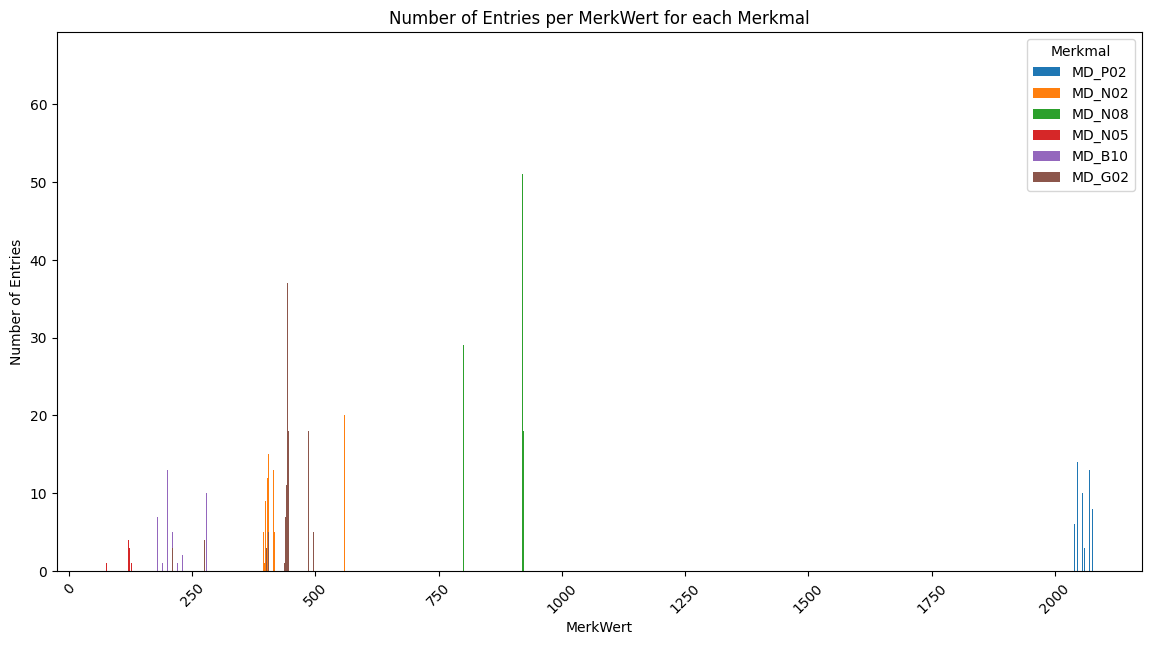

In [43]:
import matplotlib.pyplot as plt

# Assuming percentage_distributions is populated with the relevant data
# as described in your previous snippet.

# Plotting the number of entries for each MerkWert per Merkmal
fig, ax = plt.subplots(figsize=(14, 7))

# Iterating through each Merkmal
for merkmal, distributions in percentage_distributions.items():
    merkwerte = distributions.keys()
    counts = [len(values) for values in distributions.values()]

    # Create a bar plot for each MerkWert for the current Merkmal
    ax.bar(merkwerte, counts, label=merkmal)

ax.set_xlabel('MerkWert')
ax.set_ylabel('Number of Entries')
ax.set_title('Number of Entries per MerkWert for each Merkmal')
ax.legend(title="Merkmal")

plt.xticks(rotation=45)
plt.show()


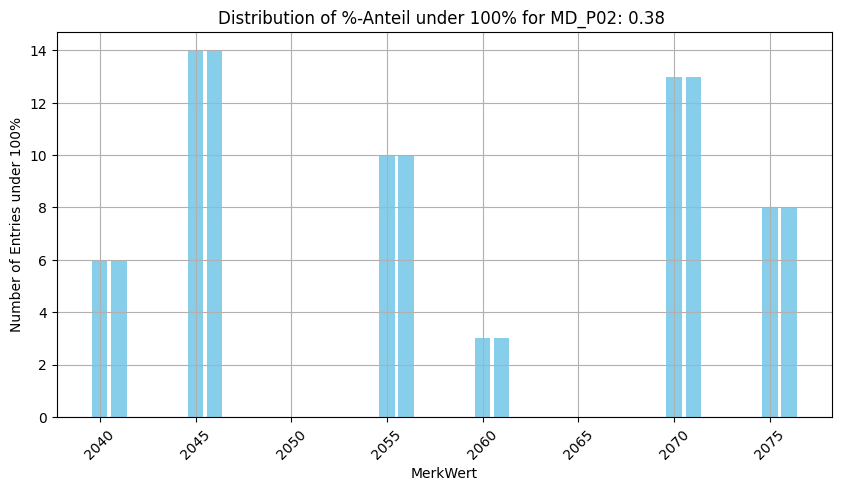

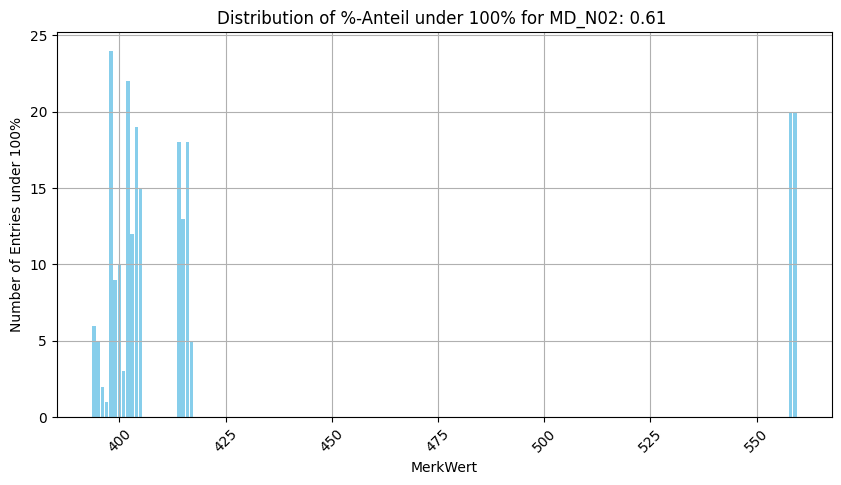

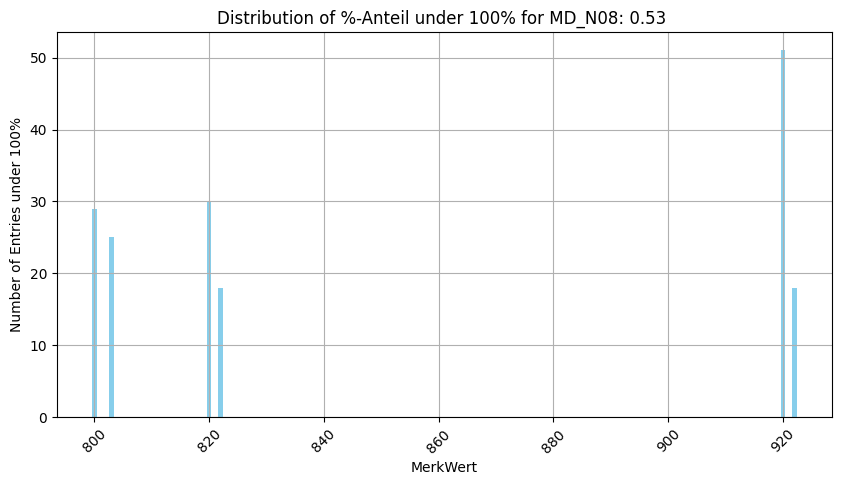

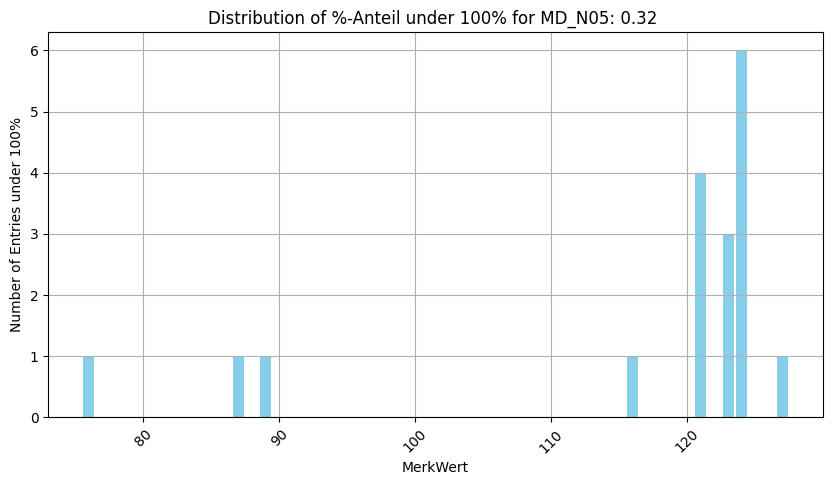

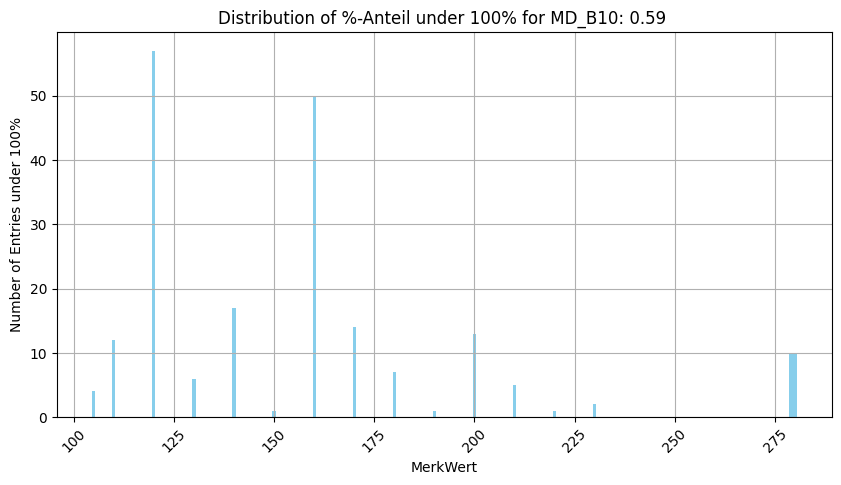

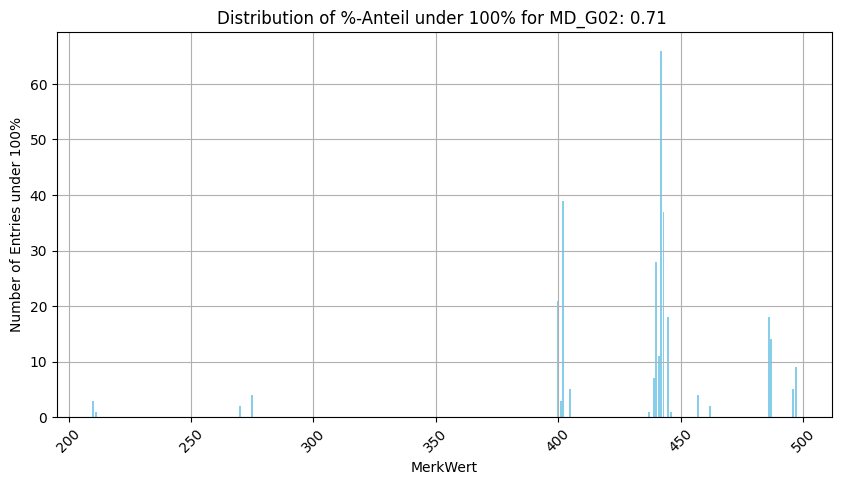

In [50]:
import matplotlib.pyplot as plt

# Assuming percentage_distributions contains your data as previously defined
for merkmal, distributions in percentage_distributions.items():
    merkwerte = list(distributions.keys())
    counts = [len(values) for values in distributions.values()]

    plt.figure(figsize=(10, 5))  # Set the figure size as per your requirement
    plt.bar(merkwerte, counts, color='skyblue')
    plt.xlabel('MerkWert')
    plt.ylabel('Number of Entries under 100%')
    plt.title(f'Distribution of %-Anteil under 100% for {merkmal}: {percentage_distributions_count[merkmal]} ')
    plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
    plt.grid(True)
    plt.show()


In [41]:

df2 = dfs['MD_B10']
# Finde alle einzigartigen Werte in der Spalte 'MerkWert'
unique_merkwerte = df2['MerkWert'].unique()

# Erstelle ein Wörterbuch, um die DataFrames zu speichern
dfs = {}

# Erstelle für jeden einzigartigen Wert in 'MerkWert' einen eigenen DataFrame
for wert in unique_merkwerte:
    dfs[wert] = df2[df2['MerkWert'] == wert].reset_index(drop=True)

# Nun kannst du auf jeden DataFrame über das Wörterbuch zugreifen, z.B.:
# Um den DataFrame für den MerkWert 2006 zu sehen
#dfs[394]

KeyError: 'MD_B10'

In [37]:
dfs['MD_P02']


,Material,UTyp,Jahr,PLand,Merkmal,MerkWert,S-Merkmal,S-Maschine,%-Anteil,Bezeich.Merkmalwert
0,20011530,113,2023,CRU,MD_P02,2006,5,5,100,QSB67 K R120-190 T3
1,20011530,113,2023,TW,MD_P02,2006,1,1,100,QSB67 K R120-190 T3
2,20011530,113,2023,UZ,MD_P02,2006,1,1,100,QSB67 K R120-190 T3
3,20011530,113,2023,XS,MD_P02,2006,3,3,100,QSB67 K R120-190 T3
4,20011530,115,2023,AT,MD_P02,2040,3,3,100,B6.7 R120-190 E5/T4
...,...,...,...,...,...,...,...,...,...,...
276,20011550,845,2023,IT,MD_P02,2076,6,7,86,L9 K R120-320 E5/T4
277,20011550,845,2023,LV,MD_P02,2076,1,1,100,L9 K R120-320 E5/T4
278,20011550,845,2023,RO,MD_P02,2076,1,1,100,L9 K R120-320 E5/T4
279,20011550,845,2023,SE,MD_P02,2075,1,1,100,L9 R120-320 E5/T4


In [42]:
print(unique_merkwerte)

[170 105 110 160 120 200 130 140 180 161 280 279 150 210 230 190 220]


In [43]:
len(unique_merkwerte)

17

In [49]:
#Gibt die Summe der MerkWerte pro Merkmal sowie die gesamte Anzahl an MerkWerten aus
sum = 0
for merkmal in merkmale:
    # Filtere den DataFrame für das aktuelle Merkmal
    filtered_df = df[df['Merkmal'] == merkmal]
    # Setze den Index zurück
    filtered_df = filtered_df.reset_index(drop=True)
    unique_merkwerte = filtered_df['MerkWert'].unique()
    sum += len(unique_merkwerte)
    print(merkmal, len(unique_merkwerte))
    
print(sum)




 

MD_P02 25
MD_N02 22
MD_N08 7
MD_N05 11
MD_B10 17
MD_G02 24
106


# Take Rate Analysis 2021-2023

### Einlesen der Ausgangsdaten und Überprüfung der Datenstruktur (Zeilen, Spalten)

In [118]:
df_24 = pd.read_excel('CLAAS_data/Option Take Rate_2024.XLSX')
df_23 = pd.read_excel('CLAAS_data/Option Take Rate_2023.XLSX')
df_22 = pd.read_excel('CLAAS_data/Option Take Rate_2022.XLSX')
df_21 = pd.read_excel('CLAAS_data/Option Take Rate_2021.XLSX')

print(df_24.shape)
print(df_23.shape)
print(df_22.shape)
print(df_21.shape)

(30868, 12)
(26199, 10)
(39365, 10)
(35618, 10)


In [119]:
df_24 = df_24.drop(['V', 'Ausführungsart ( A / B / E / M / T / _ )'], axis=1)
df_24 = df_24.rename(columns={
    'Material': 'Material',
    'Merkmalname': 'Merkmal',
    'Merkmalwert': 'MerkWert',
    'S-Merkmal': 'S-Merkmal',
    'S-Maschine': 'S-Maschine',
    '%-Anteil': '%-Anteil',
    'Bezeich.Merkmalwert': 'Bezeich.Merkmalwert',
    'Jahr': 'Jahr',
    'Claas-Planungsland': 'PLand',
    'CLAAS - Untertyp': 'UTyp'
})
df_24 = df_24[['Material', 'UTyp', 'Jahr', 'PLand', 'Merkmal', 'MerkWert', 'S-Merkmal', 'S-Maschine', '%-Anteil', 'Bezeich.Merkmalwert']]
df_24

,Material,UTyp,Jahr,PLand,Merkmal,MerkWert,S-Merkmal,S-Maschine,%-Anteil,Bezeich.Merkmalwert
0,20002830,215,2024,CPL,MD_B00,0020,5,5,100,Generation 1
1,20002830,215,2024,CPL,MD_B05,0013,4,5,80,LED klappb. Vorsätze
2,20002830,215,2024,CPL,MD_B06,0060,2,5,40,Standard Antr.
3,20002830,215,2024,CPL,MD_B06,0064,1,5,20,Variabler Antr.
4,20002830,215,2024,CPL,MD_B06,0068,2,5,40,Stufen Antr.
...,...,...,...,...,...,...,...,...,...,...
30863,20002860,965,2024,SE,MD_T02,0140,2,2,100,LKW
30864,20002860,965,2024,SE,MD_T03,0310,1,2,50,KT-Auslaufr 7XL 420 BP
30865,20002860,965,2024,SE,MD_T04,0010,2,2,100,Standard
30866,20002860,965,2024,SE,MD_Z02,1814,1,2,50,591/045 CONVIO FLEX 1380


In [102]:
df_23

,Material,UTyp,Jahr,PLand,Merkmal,MerkWert,S-Merkmal,S-Maschine,%-Anteil,Bezeich.Merkmalwert
0,20011530,113,2023,CRU,MD_B00,10,5,5,100,Generation 0
1,20011530,113,2023,CRU,MD_B06,60,5,5,100,Standard Antr.
2,20011530,113,2023,CRU,MD_B08,40,5,5,100,SW-Zylinder 2-Wege System
3,20011530,113,2023,CRU,MD_B10,170,5,5,100,V-Kanal CAC gesch Kette
4,20011530,113,2023,CRU,MD_B11,20,5,5,100,Kupplung normal
...,...,...,...,...,...,...,...,...,...,...
26194,20011550,846,2023,CCN,MD_T03,20,6,6,100,Maschine fahrbereit
26195,20011550,846,2023,CCN,MD_T03,190,6,6,100,Konservierung (?ersee)
26196,20011550,846,2023,CCN,MD_T03,410,6,6,100,ALR-Beleuchtung 2
26197,20011550,846,2023,CCN,MD_Z02,1147,6,6,100,822/122_CERIO 680


### Reduktion der Daten auf ausgewählte Merkmale. Ausgabe Anzahl interessanter Instanzen pro Jahr.

In [121]:
# Definiere die Liste der gewünschten Merkmale
gewünschte_merkmale = ['MD_P02', 'MD_N02', 'MD_N08', 'MD_N05', 'MD_B10', 'MD_G02']

# Filtere den DataFrame, um nur Zeilen mit den gewünschten Merkmalen zu behalten
filtered_df_24 = df_24[df_24['Merkmal'].isin(gewünschte_merkmale)]
filtered_df_24 = filtered_df_24.reset_index(drop=True)

filtered_df_23 = df_23[df_23['Merkmal'].isin(gewünschte_merkmale)]
filtered_df_23 = filtered_df_23.reset_index(drop=True)

filtered_df_22 = df_22[df_22['Merkmal'].isin(gewünschte_merkmale)]
filtered_df_22 = filtered_df_22.reset_index(drop=True)

filtered_df_21 = df_21[df_21['Merkmal'].isin(gewünschte_merkmale)]
filtered_df_21 = filtered_df_21.reset_index(drop=True)

# Überprüfe das Ergebnis
print(filtered_df_24.shape)
print(filtered_df_23.shape)
print(filtered_df_22.shape)
print(filtered_df_21.shape)

(2153, 10)
(1799, 10)
(2832, 10)
(2862, 10)


### Instanzen pro Jahr deren Merkmalskonfiguration nicht 100% in dem Jahr entspricht.

In [122]:
print(filtered_df_24[filtered_df_24['%-Anteil'] < 100].shape)
print(filtered_df_23[filtered_df_23['%-Anteil'] < 100].shape)
print(filtered_df_22[filtered_df_22['%-Anteil'] < 100].shape)
print(filtered_df_21[filtered_df_21['%-Anteil'] < 100].shape)

(1026, 10)
(1028, 10)
(1408, 10)
(1743, 10)


In [93]:
filtered_df_23.head(50)

,Material,UTyp,Jahr,PLand,Merkmal,MerkWert,S-Merkmal,S-Maschine,%-Anteil,Bezeich.Merkmalwert
0,20011530,113,2023,CRU,MD_B10,170,5,5,100,V-Kanal CAC gesch Kette
1,20011530,113,2023,CRU,MD_G02,402,5,5,100,SC + STV Sm
2,20011530,113,2023,CRU,MD_N02,394,5,5,100,S1 10L
3,20011530,113,2023,CRU,MD_N08,803,5,5,100,LA S FIX 6L
4,20011530,113,2023,CRU,MD_P02,2006,5,5,100,QSB67 K R120-190 T3
5,20011530,113,2023,TW,MD_B10,105,1,1,100,Std-K ECO Cont offen Kett
6,20011530,113,2023,TW,MD_G02,400,1,1,100,C + STV Sm
7,20011530,113,2023,TW,MD_N02,394,1,1,100,S1 10L
8,20011530,113,2023,TW,MD_N08,920,1,1,100,LTA M VAR 8L
9,20011530,113,2023,TW,MD_P02,2006,1,1,100,QSB67 K R120-190 T3


### Analyse von der Anazhl Instanzen pro Merkmal deren Konfiguration nicht 100% entspricht

In [61]:
# Liste der gewünschten Merkmale
merkmale = ['MD_P02', 'MD_N02', 'MD_N08', 'MD_N05', 'MD_B10', 'MD_G02']

# Erstelle ein Wörterbuch, um die aggregierten Daten für jedes Merkmal zu speichern
percentage_distributions_23 = {}
percentage_distributions_count_23 = {}

for merkmal in merkmale:
    # Filtere den DataFrame für das aktuelle Merkmal
    filtered_df = df_23[df_23['Merkmal'] == merkmal]
    
    # Setze den Index zurück
    filtered_df = filtered_df.reset_index(drop=True)

    total_entries = filtered_df.shape[0]

    filtered_df = filtered_df[filtered_df['%-Anteil'] < 100]
    
    # Aggregate data to get distribution of %-Anteil by 'Bezeich.Merkmalwert'
    distribution_by_merkwert = filtered_df.groupby('MerkWert')['%-Anteil'].apply(list).to_dict()
    
    # Store the distribution data in the dictionary
    percentage_distributions_23[merkmal] = distribution_by_merkwert
    
    # Print the total number of entries and those under 100% for information
    entries_under_100 = filtered_df[filtered_df['%-Anteil'] < 100].shape[0]
    percentage_distributions_count_23[merkmal] =  round(entries_under_100/total_entries, 2)
    print(f"{merkmal}: {entries_under_100} entries with %-Anteil under 100%, out of {total_entries} total entries")

MD_P02: 108 entries with %-Anteil under 100%, out of 281 total entries
MD_N02: 222 entries with %-Anteil under 100%, out of 365 total entries
MD_N08: 171 entries with %-Anteil under 100%, out of 321 total entries
MD_N05: 18 entries with %-Anteil under 100%, out of 56 total entries
MD_B10: 210 entries with %-Anteil under 100%, out of 356 total entries
MD_G02: 299 entries with %-Anteil under 100%, out of 420 total entries


In [62]:
# Liste der gewünschten Merkmale
merkmale = ['MD_P02', 'MD_N02', 'MD_N08', 'MD_N05', 'MD_B10', 'MD_G02']

# Erstelle ein Wörterbuch, um die aggregierten Daten für jedes Merkmal zu speichern
percentage_distributions_22 = {}
percentage_distributions_count_22 = {}

for merkmal in merkmale:
    # Filtere den DataFrame für das aktuelle Merkmal
    filtered_df = df_22[df_22['Merkmal'] == merkmal]
    
    # Setze den Index zurück
    filtered_df = filtered_df.reset_index(drop=True)

    total_entries = filtered_df.shape[0]

    filtered_df = filtered_df[filtered_df['%-Anteil'] < 100]
    
    # Aggregate data to get distribution of %-Anteil by 'Bezeich.Merkmalwert'
    distribution_by_merkwert = filtered_df.groupby('MerkWert')['%-Anteil'].apply(list).to_dict()
    
    # Store the distribution data in the dictionary
    percentage_distributions_22[merkmal] = distribution_by_merkwert
    
    # Print the total number of entries and those under 100% for information
    entries_under_100 = filtered_df[filtered_df['%-Anteil'] < 100].shape[0]
    percentage_distributions_count_22[merkmal] =  round(entries_under_100/total_entries, 2)
    print(f"{merkmal}: {entries_under_100} entries with %-Anteil under 100%, out of {total_entries} total entries")

MD_P02: 134 entries with %-Anteil under 100%, out of 410 total entries
MD_N02: 159 entries with %-Anteil under 100%, out of 431 total entries
MD_N08: 298 entries with %-Anteil under 100%, out of 518 total entries
MD_N05: 175 entries with %-Anteil under 100%, out of 391 total entries
MD_B10: 384 entries with %-Anteil under 100%, out of 591 total entries
MD_G02: 258 entries with %-Anteil under 100%, out of 491 total entries


In [63]:
# Liste der gewünschten Merkmale
merkmale = ['MD_P02', 'MD_N02', 'MD_N08', 'MD_N05', 'MD_B10', 'MD_G02']

# Erstelle ein Wörterbuch, um die aggregierten Daten für jedes Merkmal zu speichern
percentage_distributions_21 = {}
percentage_distributions_count_21 = {}

for merkmal in merkmale:
    # Filtere den DataFrame für das aktuelle Merkmal
    filtered_df = df_21[df_21['Merkmal'] == merkmal]
    
    # Setze den Index zurück
    filtered_df = filtered_df.reset_index(drop=True)

    total_entries = filtered_df.shape[0]

    filtered_df = filtered_df[filtered_df['%-Anteil'] < 100]
    
    # Aggregate data to get distribution of %-Anteil by 'Bezeich.Merkmalwert'
    distribution_by_merkwert = filtered_df.groupby('MerkWert')['%-Anteil'].apply(list).to_dict()
    
    # Store the distribution data in the dictionary
    percentage_distributions_21[merkmal] = distribution_by_merkwert
    
    # Print the total number of entries and those under 100% for information
    entries_under_100 = filtered_df[filtered_df['%-Anteil'] < 100].shape[0]
    percentage_distributions_count_21[merkmal] =  round(entries_under_100/total_entries, 2)
    print(f"{merkmal}: {entries_under_100} entries with %-Anteil under 100%, out of {total_entries} total entries")

MD_P02: 194 entries with %-Anteil under 100%, out of 415 total entries
MD_N02: 160 entries with %-Anteil under 100%, out of 405 total entries
MD_N08: 341 entries with %-Anteil under 100%, out of 515 total entries
MD_N05: 183 entries with %-Anteil under 100%, out of 326 total entries
MD_B10: 526 entries with %-Anteil under 100%, out of 681 total entries
MD_G02: 339 entries with %-Anteil under 100%, out of 520 total entries


### Ausgabe des Anteils Instanzen mit unter 100% Konfiguration pro Merkmal pro Jahr

In [76]:
# Combine into a DataFrame
df = pd.DataFrame({
    '2021': percentage_distributions_count_21,
    '2022': percentage_distributions_count_22,
    '2023': percentage_distributions_count_23
})

# Show the DataFrame
df

,2021,2022,2023
MD_P02,0.47,0.33,0.38
MD_N02,0.40,0.37,0.61
MD_N08,0.66,0.58,0.53
MD_N05,0.56,0.45,0.32
MD_B10,0.77,0.65,0.59
MD_G02,0.65,0.53,0.71


### Analyse über alle 3 Jahre

In [123]:
result = pd.concat([filtered_df_24, filtered_df_23, filtered_df_22, filtered_df_21], ignore_index=True)
result.shape

(9646, 10)

In [138]:
result["MerkWert"].drop_duplicates().reset_index(drop=True)

0      0120
1      0160
2      0444
3      0446
4      0447
       ... 
259     954
260     963
261     967
262     966
263     350
Name: MerkWert, Length: 264, dtype: object

In [107]:
result_crop = result.drop(['Material', 'Jahr', 'S-Merkmal', 'S-Maschine', 'Bezeich.Merkmalwert'], axis=1)
result_crop

,UTyp,PLand,Merkmal,MerkWert,%-Anteil
0,113,CRU,MD_B10,170,100
1,113,CRU,MD_G02,402,100
2,113,CRU,MD_N02,394,100
3,113,CRU,MD_N08,803,100
4,113,CRU,MD_P02,2006,100
...,...,...,...,...,...
7482,933,UA,MD_N02,628,100
7484,933,UA,MD_N05,124,100
7485,933,UA,MD_N08,964,100
7487,935,GB,MD_B10,220,100


### Anzahl Kombinationen aus UTyp, PLand, Merkmal und MerkWert

In [109]:
result_crop_2 = result_crop.drop(['%-Anteil'], axis=1)
result_crop_2.drop_duplicates()

,UTyp,PLand,Merkmal,MerkWert
0,113,CRU,MD_B10,170
1,113,CRU,MD_G02,402
2,113,CRU,MD_N02,394
3,113,CRU,MD_N08,803
4,113,CRU,MD_P02,2006
...,...,...,...,...
7479,865,SK,MD_P02,969
7480,933,UA,MD_B10,210
7482,933,UA,MD_N02,628
7484,933,UA,MD_N05,124


In [87]:
grouped = result_crop.groupby(['UTyp', 'PLand', 'Merkmal', 'MerkWert', '%-Anteil']).size()

In [88]:
grouped

UTyp  PLand  Merkmal  MerkWert  %-Anteil
113   CRU    MD_B10   170       100         1
             MD_G02   402       100         1
             MD_N02   394       100         1
             MD_N08   803       100         1
             MD_P02   2006      100         1
                                           ..
965   RO     MD_N05   42        100         1
                      121       50          1
                      124       50          1
             MD_N08   864       100         1
             MD_P02   969       100         1
Length: 6494, dtype: int64

### Anzahl Kombinatiionen die über 3 Jahre immer die gleichen %-Anteil haben

In [94]:
consistent_groups = grouped[grouped == 3]
print(consistent_groups)


UTyp  PLand  Merkmal  MerkWert  %-Anteil
115   BG     MD_B10   120       100         3
      CPL    MD_B10   120       100         3
             MD_N02   450       100         3
      DE     MD_N02   450       100         3
      FR     MD_N02   450       100         3
                                           ..
925   DE     MD_N02   628       100         3
             MD_N05   5         100         3
945   DE     MD_G02   487       100         3
             MD_N02   628       100         3
             MD_N05   5         100         3
Length: 83, dtype: int64


In [97]:
consistent_df = consistent_groups.reset_index(name='Count')

# Filtern der Einträge, bei denen der %-Anteil unter 100 liegt
filtered_consistent = consistent_df[consistent_df['%-Anteil'] < 100]

print(filtered_consistent)

    UTyp PLand Merkmal  MerkWert  %-Anteil  Count
18   125   CPL  MD_N08       920        13      3
21   125    FR  MD_B10       140         3      3
36   145    DK  MD_B10       200        25      3
38   145    ES  MD_N02       703        67      3


In [98]:
consistent_groups.reset_index(name='Count')

,UTyp,PLand,Merkmal,MerkWert,%-Anteil,Count
0,115,BG,MD_B10,120,100,3
1,115,CPL,MD_B10,120,100,3
2,115,CPL,MD_N02,450,100,3
3,115,DE,MD_N02,450,100,3
4,115,FR,MD_N02,450,100,3
...,...,...,...,...,...,...
78,925,DE,MD_N02,628,100,3
79,925,DE,MD_N05,5,100,3
80,945,DE,MD_G02,487,100,3
81,945,DE,MD_N02,628,100,3


# Neue Daten

In [157]:
import pandas as pd

df = pd.read_excel('CLAAS_data/S612_P10_CSE_20240529.XLSX')


In [48]:
df

,Version,Datum,Werk,Material,Objekttyp,Seriennummer,Merkmalskombination,Kombinationsschlüssel,Merkmalname,Merkmalwert,Merkmalbezeichnung,Bezeich.Merkmalwert,Bestätigte Menge
0,0,2013-10-14,10,20002640,C64,C6414031,15624,2,MD_B04,20,MD_B04_Schneidwerks-Führung,0020_Auto-Cont:SW-Reg.Seitenau,15
1,0,2013-10-14,10,20002640,C64,C6414031,15625,1,MD_B05,10,MD_B05_Zubehör Vorsatz,0010_Beleucht.klappb.Vorsätze,3
2,0,2013-10-14,10,20002640,C64,C6414031,15625,3,MD_B05,201,MD_B05_Zubehör Vorsatz,0201_Autopilot fuer ULA,3
3,0,2013-10-14,10,20002640,C64,C6414031,15625,6,MD_B05,130,MD_B05_Zubehör Vorsatz,0130_Laserpilotsensor li,3
4,0,2013-10-14,10,20002640,C64,C6414031,15626,1,MD_B06,10,MD_B06_Schneidwerksantrieb,0010_SW-Antrieb Standard,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
458028,0,2024-09-10,10,20002840,C84,C8424511,29951,2,MD_B00,20,MD_B00_Architektur,0020_Generation 1,1
458029,0,2024-09-10,10,20002840,C84,C8424511,30252,9,MD_N14,130,MD_N14_Plattform,0130_Plattform TT L1,1
458030,0,2024-09-10,10,20002840,C84,C8424511,30495,13,MD_F12,140,MD_F12_Auslaufrohrtülle,0140_Tülle schwenkbar 330 XL,1
458031,0,2024-09-10,10,20002840,C84,C8424511,30557,2,MD_Q34,10,MD_Q34_Module,0010_CHS 1,1


In [158]:
df["Merkmalname"].drop_duplicates().reset_index(drop=True)

0     MD_B04
1     MD_B05
2     MD_B06
3     MD_B08
4     MD_B10
       ...  
90    MD_N14
91    MD_Q41
92    MD_S10
93    MD_Z05
94    MD_Q36
Name: Merkmalname, Length: 95, dtype: object

In [159]:
merkmale = ['MD_P02', 'MD_N02', 'MD_N08', 'MD_N05', 'MD_B10', 'MD_G02']

filtered_df = df[df['Merkmalname'].isin(merkmale)]
filtered_df = filtered_df.drop([ 'Werk', 'Version', 'Merkmalskombination'], axis=1)

filtered_df.reset_index(drop=True)

,Datum,Material,Objekttyp,Seriennummer,Kombinationsschlüssel,Merkmalname,Merkmalwert,Merkmalbezeichnung,Bezeich.Merkmalwert,Bestätigte Menge
0,2013-10-14,20002640,C64,C6414031,3,MD_B10,35,MD_B10_Einzugskanal,0035_E-Kanal Contour,15
1,2013-10-14,20002640,C64,C6414031,1,MD_G02,210,MD_G02_Strohablage,0210_Strohleitschurz,3
2,2013-10-14,20002640,C64,C6414031,4,MD_G02,225,MD_G02_Strohablage,0225_Strohh SC,4
3,2013-10-14,20002640,C64,C6414031,6,MD_G02,235,MD_G02_Strohablage,0235_Strohh SC/SV,8
4,2013-10-14,20002640,C64,C6414031,1,MD_N02,382,MD_N02_Fahrantrieb,0382_TA EFA M. 10L,10
...,...,...,...,...,...,...,...,...,...,...
55423,2024-09-10,20002840,C84,C8424511,3,MD_N02,628,MD_N02_Fahrantrieb,0628_TA EFA XL TERRA TRAC,1
55424,2024-09-10,20002840,C84,C8424511,11,MD_N05,5,MD_N05_Zubehör Triebachsbereif,0005_Bergeösen,1
55425,2024-09-10,20002840,C84,C8424511,12,MD_N05,421,MD_N05_Zubehör Triebachsbereif,0421_TT 635 HL,1
55426,2024-09-10,20002840,C84,C8424511,9,MD_N08,820,MD_N08_Lenkachse,0820_LA M VAR 8L,1


In [160]:
filtered_df["Merkmalwert"].drop_duplicates().reset_index(drop=True)

0       35
1      210
2      225
3      235
4      382
      ... 
324    456
325    467
326    136
327    829
328    823
Name: Merkmalwert, Length: 329, dtype: int64

In [162]:
# Konvertieren des Datumsstrings in ein datetime-Objekt, falls notwendig
filtered_df['Datum'] = pd.to_datetime(filtered_df['Datum'], format='%Y-%m-%d')

# Filtern des DataFrames, um nur Daten vor oder am 31. Mai 2024 zu erhalten
filtered_df2 = filtered_df[filtered_df['Datum'] <= pd.Timestamp('2024-05-31')]


In [163]:
filtered_df_crop = filtered_df.drop(['Seriennummer', 'Werk', 'Material', 'Version'], axis=1)
filtered_df_crop

KeyError: "['Werk', 'Version'] not found in axis"

In [164]:
# Gruppieren nach 'Merkmalname' und 'Merkmalwert' und Summieren der 'Bestätigte Menge'
grouped_df = filtered_df.groupby(['Merkmalname', 'Merkmalwert'])['Bestätigte Menge'].sum().reset_index()

# Umbenennen der Spalte für eine klarere Darstellung
grouped_df.rename(columns={'Bestätigte Menge': 'Gesamte Bestätigte Menge'}, inplace=True)

# Ausgabe des resultierenden DataFrames
print(grouped_df)


    Merkmalname  Merkmalwert  Gesamte Bestätigte Menge
0        MD_B10           30                      2338
1        MD_B10           33                        91
2        MD_B10           35                      4307
3        MD_B10           36                      7995
4        MD_B10           37                         0
..          ...          ...                       ...
377      MD_P02         2071                       329
378      MD_P02         2073                        24
379      MD_P02         2075                       316
380      MD_P02         2076                       205
381      MD_P02         2078                        27

[382 rows x 3 columns]


In [165]:
# Berechnen der Anzahl der Merkmalwerte für jeden Merkmalnamen
merkmal_counts = filtered_df.groupby('Merkmalname')['Merkmalwert'].nunique()
print(merkmal_counts)


Merkmalname
MD_B10     34
MD_G02     53
MD_N02     66
MD_N05     38
MD_N08     53
MD_P02    138
Name: Merkmalwert, dtype: int64


In [173]:
import pandas as pd
from collections import defaultdict

# Angenommen df ist Ihr DataFrame und er enthält eine 'Datum'-Spalte im Datetime-Format
# Wenn das 'Datum' nicht im Datetime-Format ist, konvertieren Sie es wie folgt:
# df['Datum'] = pd.to_datetime(df['Datum'])

# Ein Wörterbuch, um die DataFrames zu speichern
monthly_aggregates = defaultdict(dict)

# Gruppierung nach 'Merkmalname' und 'Merkmalwert'
grouped = filtered_df.groupby(['Merkmalname', 'Merkmalwert'])

# Durchlaufen aller Gruppen
for (merkmalname, merkmalwert), group in grouped:
    # Aggregation der 'Bestätigte Menge' nach Monat
    monthly_data = group.resample('M', on='Datum')['Bestätigte Menge'].sum()
    # Speichern des aggregierten DataFrames im Wörterbuch
    monthly_aggregates[merkmalname][merkmalwert] = monthly_data.reset_index()

# Beispiel, um auf die Daten zuzugreifen:
for merkmalname, values in monthly_aggregates.items():
    for merkmalwert, data_df in values.items():
        print(f"Merkmalname: {merkmalname}, Merkmalwert: {merkmalwert}")
        print(data_df)
        print()  # Für bessere Lesbarkeit eine leere Zeile hinzufügen


/var/folders/72/wtk5zn4j7qzfk4nhglnbm5vh0000gp/T/ipykernel_3374/2811588381.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = group.resample('M', on='Datum')['Bestätigte Menge'].sum()
/var/folders/72/wtk5zn4j7qzfk4nhglnbm5vh0000gp/T/ipykernel_3374/2811588381.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = group.resample('M', on='Datum')['Bestätigte Menge'].sum()
/var/folders/72/wtk5zn4j7qzfk4nhglnbm5vh0000gp/T/ipykernel_3374/2811588381.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = group.resample('M', on='Datum')['Bestätigte Menge'].sum()
/var/folders/72/wtk5zn4j7qzfk4nhglnbm5vh0000gp/T/ipykernel_3374/2811588381.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = group.resample('M', on='Datum')['B

Merkmalname: MD_B10, Merkmalwert: 30
        Datum  Bestätigte Menge
0  2013-10-31                 1
1  2013-11-30                 0
2  2013-12-31                 7
3  2014-01-31                 0
4  2014-02-28                 0
5  2014-03-31                 0
6  2014-04-30                48
7  2014-05-31                42
8  2014-06-30                19
9  2014-07-31                 0
10 2014-08-31                 0
11 2014-09-30                 0
12 2014-10-31                 0
13 2014-11-30                 0
14 2014-12-31                17
15 2015-01-31                 0
16 2015-02-28                74
17 2015-03-31               173
18 2015-04-30               156
19 2015-05-31               127
20 2015-06-30               205
21 2015-07-31                62
22 2015-08-31                71
23 2015-09-30                 0
24 2015-10-31                75
25 2015-11-30               192
26 2015-12-31                64
27 2016-01-31               117
28 2016-02-29               197
29 

/var/folders/72/wtk5zn4j7qzfk4nhglnbm5vh0000gp/T/ipykernel_3374/2811588381.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = group.resample('M', on='Datum')['Bestätigte Menge'].sum()
/var/folders/72/wtk5zn4j7qzfk4nhglnbm5vh0000gp/T/ipykernel_3374/2811588381.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = group.resample('M', on='Datum')['Bestätigte Menge'].sum()
/var/folders/72/wtk5zn4j7qzfk4nhglnbm5vh0000gp/T/ipykernel_3374/2811588381.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = group.resample('M', on='Datum')['Bestätigte Menge'].sum()
/var/folders/72/wtk5zn4j7qzfk4nhglnbm5vh0000gp/T/ipykernel_3374/2811588381.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = group.resample('M', on='Datum')['B

In [167]:
# Filtern des DataFrames für das Jahr 2024
df_2024 = filtered_df[filtered_df['Datum'].dt.year == 2024]

# Berechnen der Anzahl der Merkmalwerte für jeden Merkmalnamen
merkmal_counts = df_2024.groupby('Merkmalname')['Merkmalwert'].nunique()
print(merkmal_counts)


Merkmalname
MD_B10    16
MD_G02    30
MD_N02    31
MD_N05    19
MD_N08    20
MD_P02    54
Name: Merkmalwert, dtype: int64


In [172]:
import pandas as pd
from collections import defaultdict

# Angenommen df ist Ihr DataFrame und er enthält eine 'Datum'-Spalte im Datetime-Format
# Wenn das 'Datum' nicht im Datetime-Format ist, konvertieren Sie es wie folgt:
# df['Datum'] = pd.to_datetime(df['Datum'])

# Ein Wörterbuch, um die DataFrames zu speichern
monthly_aggregates = defaultdict(dict)

# Gruppierung nach 'Merkmalname' und 'Merkmalwert'
grouped = df_2024.groupby(['Merkmalname', 'Merkmalwert'])

# Durchlaufen aller Gruppen
for (merkmalname, merkmalwert), group in grouped:
    # Aggregation der 'Bestätigte Menge' nach Monat
    monthly_data = group.resample('M', on='Datum')['Bestätigte Menge'].sum()
    # Speichern des aggregierten DataFrames im Wörterbuch
    monthly_aggregates[merkmalname][merkmalwert] = monthly_data.reset_index()

# Beispiel, um auf die Daten zuzugreifen:
for merkmalname, values in monthly_aggregates.items():
    for merkmalwert, data_df in values.items():
        print(f"Merkmalname: {merkmalname}, Merkmalwert: {merkmalwert}")
        print(data_df)
        print()  # Für bessere Lesbarkeit eine leere Zeile hinzufügen

Merkmalname: MD_B10, Merkmalwert: 105
       Datum  Bestätigte Menge
0 2024-01-31                 1
1 2024-02-29                 5
2 2024-03-31                 0
3 2024-04-30                 3

Merkmalname: MD_B10, Merkmalwert: 110
       Datum  Bestätigte Menge
0 2024-01-31                 8
1 2024-02-29                 4
2 2024-03-31                 5
3 2024-04-30                 4
4 2024-05-31                 1
5 2024-06-30                 3
6 2024-07-31                 8
7 2024-08-31                 0

Merkmalname: MD_B10, Merkmalwert: 120
       Datum  Bestätigte Menge
0 2024-01-31                67
1 2024-02-29                49
2 2024-03-31                45
3 2024-04-30                80
4 2024-05-31                44
5 2024-06-30                54
6 2024-07-31                15
7 2024-08-31                 0
8 2024-09-30                 0

Merkmalname: MD_B10, Merkmalwert: 130
       Datum  Bestätigte Menge
0 2024-01-31                 8
1 2024-02-29                 5
2 2024-0

/var/folders/72/wtk5zn4j7qzfk4nhglnbm5vh0000gp/T/ipykernel_3374/2908628014.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = group.resample('M', on='Datum')['Bestätigte Menge'].sum()
/var/folders/72/wtk5zn4j7qzfk4nhglnbm5vh0000gp/T/ipykernel_3374/2908628014.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = group.resample('M', on='Datum')['Bestätigte Menge'].sum()
/var/folders/72/wtk5zn4j7qzfk4nhglnbm5vh0000gp/T/ipykernel_3374/2908628014.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = group.resample('M', on='Datum')['Bestätigte Menge'].sum()
/var/folders/72/wtk5zn4j7qzfk4nhglnbm5vh0000gp/T/ipykernel_3374/2908628014.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = group.resample('M', on='Datum')['B

In [169]:
print(df_2024)

            Datum  Material Objekttyp Seriennummer  Kombinationsschlüssel  \
415079 2024-01-04  20002830       C83     C8324151                      5   
415080 2024-01-04  20002830       C83     C8324151                      9   
415099 2024-01-04  20002830       C83     C8324151                      1   
415100 2024-01-04  20002830       C83     C8324151                      9   
415104 2024-01-04  20002830       C83     C8324151                      1   
...           ...       ...       ...          ...                    ...   
457960 2024-09-10  20002840       C84     C8424511                      3   
457962 2024-09-10  20002840       C84     C8424511                     11   
457963 2024-09-10  20002840       C84     C8424511                     12   
457965 2024-09-10  20002840       C84     C8424511                      9   
457968 2024-09-10  20002840       C84     C8424511                      7   

       Merkmalname  Merkmalwert              Merkmalbezeichnung  \
415079  

In [39]:
# Speichere den DataFrame in eine Excel-Datei mit spezifischen Optionen
df_2024.to_excel('mein_dataframe.xlsx', sheet_name='MeineDaten', index=False, engine='openpyxl', startrow=1, startcol=1)



In [43]:
df_2024_s = df_2024[df_2024["Seriennummer"] == "C8424151"]
df_2024_s

,Version,Datum,Werk,Material,Objekttyp,Seriennummer,Merkmalskombination,Kombinationsschlüssel,Merkmalname,Merkmalwert,Merkmalbezeichnung,Bezeich.Merkmalwert,Bestätigte Menge
415166,0,2024-01-04,10,20002840,C84,C8424151,26326,5,MD_B10,160,MD_B10_Einzugskanal,0160_V-Kanal CAC offen Kette,1
415167,0,2024-01-04,10,20002840,C84,C8424151,26326,7,MD_B10,180,MD_B10_Einzugskanal,0180_V-Kanal CAC offen Gurtb.,1
415186,0,2024-01-04,10,20002840,C84,C8424151,26343,15,MD_G02,486,MD_G02_Strohablage,0486_SC + RV Sk + SV,1
415187,0,2024-01-04,10,20002840,C84,C8424151,26343,16,MD_G02,487,MD_G02_Strohablage,0487_SC HD + RV Sk + SV,1
415191,0,2024-01-04,10,20002840,C84,C8424151,26346,3,MD_N02,628,MD_N02_Fahrantrieb,0628_TA EFA XL TERRA TRAC,2
415193,0,2024-01-04,10,20002840,C84,C8424151,26348,11,MD_N05,5,MD_N05_Zubehör Triebachsbereif,0005_Bergeösen,2
415194,0,2024-01-04,10,20002840,C84,C8424151,26348,12,MD_N05,421,MD_N05_Zubehör Triebachsbereif,0421_TT 635 HL,2
415196,0,2024-01-04,10,20002840,C84,C8424151,26350,9,MD_N08,820,MD_N08_Lenkachse,0820_LA M VAR 8L,2
415199,0,2024-01-04,10,20002840,C84,C8424151,26353,9,MD_P02,915,MD_P02_Motorausführungen,0915_OM470 R120-340 E5,2


In [44]:
df_2024_s = df_2024[df_2024["Seriennummer"] == "C8624151"]
df_2024_s

,Version,Datum,Werk,Material,Objekttyp,Seriennummer,Merkmalskombination,Kombinationsschlüssel,Merkmalname,Merkmalwert,Merkmalbezeichnung,Bezeich.Merkmalwert,Bestätigte Menge
415404,0,2024-01-04,10,20002860,C86,C8624151,26446,1,MD_B10,120,MD_B10_Einzugskanal,0120_Std-Kanal CAC offen Kette,1
415405,0,2024-01-04,10,20002860,C86,C8624151,26446,5,MD_B10,160,MD_B10_Einzugskanal,0160_V-Kanal CAC offen Kette,3
415406,0,2024-01-04,10,20002860,C86,C8624151,26446,6,MD_B10,170,MD_B10_Einzugskanal,0170_V-Kanal CAC gesch Kette,0
415407,0,2024-01-04,10,20002860,C86,C8624151,26446,9,MD_B10,200,MD_B10_Einzugskanal,0200_HP-Kanal offen Kette,2
415408,0,2024-01-04,10,20002860,C86,C8624151,26446,10,MD_B10,210,MD_B10_Einzugskanal,0210_HP-Kanal gesch Kette,1
415409,0,2024-01-04,10,20002860,C86,C8624151,26446,11,MD_B10,220,MD_B10_Einzugskanal,0220_HP-Kanal offen Gurtb.,0
415410,0,2024-01-04,10,20002860,C86,C8624151,26446,12,MD_B10,230,MD_B10_Einzugskanal,0230_HP-Kanal gesch Gurtb.,1
415460,0,2024-01-04,10,20002860,C86,C8624151,26463,15,MD_G02,486,MD_G02_Strohablage,0486_SC + RV Sk + SV,2
415461,0,2024-01-04,10,20002860,C86,C8624151,26463,16,MD_G02,487,MD_G02_Strohablage,0487_SC HD + RV Sk + SV,3
415462,0,2024-01-04,10,20002860,C86,C8624151,26463,17,MD_G02,497,MD_G02_Strohablage,0497_SC HD U + RV HD Sk + SV,3


In [170]:
import matplotlib.pyplot as plt


def plot_time_series(data_dict, merkmalname, merkmalwert):
    # Zugriff auf den DataFrame unter dem gegebenen Merkmalnamen und Merkmalwert
    df = data_dict.get(merkmalname, {}).get(merkmalwert)
    
    if df is not None:
        # Erstelle einen Plot
        plt.figure(figsize=(10, 5))
        plt.plot(pd.to_datetime(df['Datum']), df['Relativer Anteil'], marker='o', linestyle='-')
        plt.title(f'Zeitreihe für {merkmalname} {merkmalwert}')
        plt.xlabel('Datum')
        plt.ylabel('Bestätigte Menge')
        plt.grid(True)
        plt.show()
    else:
        print(f"Keine Daten gefunden für {merkmalname} mit Merkmalwert {merkmalwert}")

# Zum Plotten für MD_N08 mit Merkmalwert '840'
plot_time_series(monthly_aggregates, 'MD_P02', 851)

KeyError: 'Relativer Anteil'

<Figure size 1000x500 with 0 Axes>

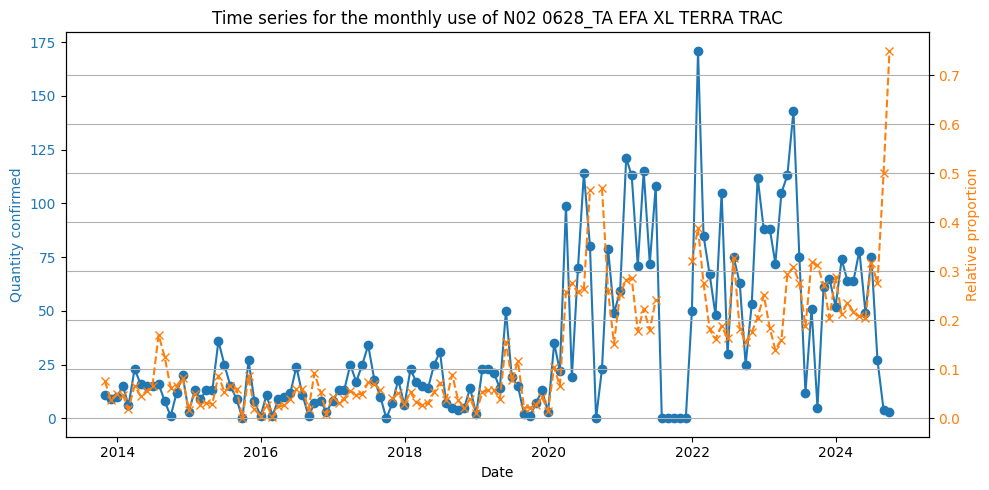

In [182]:
import matplotlib.pyplot as plt

def plot_time_series(data_dict, merkmalname, merkmalwert):
    # Zugriff auf den DataFrame unter dem gegebenen Merkmalnamen und Merkmalwert
    df = data_dict.get(merkmalname, {}).get(merkmalwert)
    
    if df is not None:
        # Erstelle einen Plot mit zwei Y-Achsen
        fig, ax1 = plt.subplots(figsize=(10, 5))
        
        # Bestätigte Menge auf der linken Y-Achse
        color = 'tab:blue'
        ax1.set_xlabel('Date')
        ax1.set_ylabel('Quantity confirmed', color=color)
        ax1.plot(pd.to_datetime(df['Datum']), df['Bestätigte Menge'], color=color, marker='o', linestyle='-')
        ax1.tick_params(axis='y', labelcolor=color)
        
        # Relativer Anteil auf der rechten Y-Achse
        ax2 = ax1.twinx()
        color = 'tab:orange'
        ax2.set_ylabel('Relative proportion', color=color)
        ax2.plot(pd.to_datetime(df['Datum']), df['Relativer Anteil'], color=color, marker='x', linestyle='--')
        ax2.tick_params(axis='y', labelcolor=color)
        
        # Titel und weitere Anpassungen
        plt.title(f'Time series for the monthly use of N02 0628_TA EFA XL TERRA TRAC')
        plt.grid(True)
        fig.tight_layout()  # passt Layout an, um Überlappungen zu verhindern
        plt.show()
    else:
        print(f"Keine Daten gefunden für {merkmalname} mit Merkmalwert {merkmalwert}")

# Beispielaufruf
plot_time_series(monthly_aggregates, 'MD_N02', 628)


In [174]:
monthly_aggregates

defaultdict(dict,
            {'MD_B10': {30:         Datum  Bestätigte Menge
              0  2013-10-31                 1
              1  2013-11-30                 0
              2  2013-12-31                 7
              3  2014-01-31                 0
              4  2014-02-28                 0
              5  2014-03-31                 0
              6  2014-04-30                48
              7  2014-05-31                42
              8  2014-06-30                19
              9  2014-07-31                 0
              10 2014-08-31                 0
              11 2014-09-30                 0
              12 2014-10-31                 0
              13 2014-11-30                 0
              14 2014-12-31                17
              15 2015-01-31                 0
              16 2015-02-28                74
              17 2015-03-31               173
              18 2015-04-30               156
              19 2015-05-31               127
  

In [58]:
print(monthly_aggregates['MD_B10'].keys())


dict_keys([105, 110, 120, 130, 140, 150, 160, 161, 170, 175, 180, 200, 210, 220, 230, 280])


In [175]:
import pandas as pd
from collections import defaultdict

# Angenommen df ist Ihr DataFrame und er enthält eine 'Datum'-Spalte im Datetime-Format
# Wenn das 'Datum' nicht im Datetime-Format ist, konvertieren Sie es wie folgt:
# df['Datum'] = pd.to_datetime(df['Datum'])

# Ein Wörterbuch, um die DataFrames zu speichern
monthly_aggregates = defaultdict(dict)

# Gruppierung nach 'Merkmalname'
grouped_by_merkmalname = filtered_df.groupby('Merkmalname')

# Erstellen eines Wörterbuchs für die Gesamtmengen pro Merkmalname und Monat
total_monthly_by_merkmalname = {}

# Berechnen der monatlichen Gesamtmengen für jedes Merkmalname
for merkmalname, group in grouped_by_merkmalname:
    total_monthly = group.resample('M', on='Datum')['Bestätigte Menge'].sum()
    total_monthly_by_merkmalname[merkmalname] = total_monthly

# Gruppierung nach 'Merkmalname' und 'Merkmalwert'
grouped = filtered_df.groupby(['Merkmalname', 'Merkmalwert'])

# Durchlaufen aller Gruppen
for (merkmalname, merkmalwert), group in grouped:
    # Aggregation der 'Bestätigte Menge' nach Monat
    monthly_data = group.resample('M', on='Datum')['Bestätigte Menge'].sum().reset_index()
    # Berechnen des relativen Anteils
    relative_share = monthly_data.set_index('Datum')['Bestätigte Menge'] / total_monthly_by_merkmalname[merkmalname].reindex(monthly_data['Datum'], fill_value=0)
    # Hinzufügen der Spalte für den relativen Anteil
    monthly_data['Relativer Anteil'] = relative_share.values  # Achten Sie darauf, die Datum-Indizierung beizubehalten
    # Speichern des DataFrames im Wörterbuch
    monthly_aggregates[merkmalname][merkmalwert] = monthly_data

# Beispiel, um auf die Daten zuzugreifen:
for merkmalname, values in monthly_aggregates.items():
    for merkmalwert, data_df in values.items():
        print(f"Merkmalname: {merkmalname}, Merkmalwert: {merkmalwert}")
        print(data_df)
        print()  # Für bessere Lesbarkeit eine leere Zeile hinzufügen


/var/folders/72/wtk5zn4j7qzfk4nhglnbm5vh0000gp/T/ipykernel_3374/3033686791.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  total_monthly = group.resample('M', on='Datum')['Bestätigte Menge'].sum()
/var/folders/72/wtk5zn4j7qzfk4nhglnbm5vh0000gp/T/ipykernel_3374/3033686791.py:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = group.resample('M', on='Datum')['Bestätigte Menge'].sum().reset_index()
/var/folders/72/wtk5zn4j7qzfk4nhglnbm5vh0000gp/T/ipykernel_3374/3033686791.py:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = group.resample('M', on='Datum')['Bestätigte Menge'].sum().reset_index()
/var/folders/72/wtk5zn4j7qzfk4nhglnbm5vh0000gp/T/ipykernel_3374/3033686791.py:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = group

Merkmalname: MD_B10, Merkmalwert: 30
        Datum  Bestätigte Menge  Relativer Anteil
0  2013-10-31                 1          0.006944
1  2013-11-30                 0          0.000000
2  2013-12-31                 7          0.034314
3  2014-01-31                 0          0.000000
4  2014-02-28                 0          0.000000
5  2014-03-31                 0          0.000000
6  2014-04-30                48          0.138329
7  2014-05-31                42          0.156134
8  2014-06-30                19          0.084821
9  2014-07-31                 0          0.000000
10 2014-08-31                 0          0.000000
11 2014-09-30                 0          0.000000
12 2014-10-31                 0          0.000000
13 2014-11-30                 0          0.000000
14 2014-12-31                17          0.102410
15 2015-01-31                 0          0.000000
16 2015-02-28                74          0.243421
17 2015-03-31               173          0.418886
18 2015-04-30

In [83]:
gg = monthly_aggregates["MD_N02"]
gg

{40:         Datum  Bestätigte Menge  Relativer Anteil
 0  2013-10-31                 1          0.006897
 1  2013-11-30                 0          0.000000
 2  2013-12-31                 0          0.000000
 3  2014-01-31                 0          0.000000
 4  2014-02-28                 0          0.000000
 ..        ...               ...               ...
 88 2021-02-28                25          0.063131
 89 2021-03-31                 0          0.000000
 90 2021-04-30                 0          0.000000
 91 2021-05-31                 0          0.000000
 92 2021-06-30                10          0.022371
 
 [93 rows x 3 columns],
 254:         Datum  Bestätigte Menge  Relativer Anteil
 0  2013-12-31                 7          0.034314
 1  2014-01-31                 0          0.000000
 2  2014-02-28                 0          0.000000
 3  2014-03-31                 0          0.000000
 4  2014-04-30                29          0.083573
 ..        ...               ...               

# Neue Daten

In [2]:
import pandas as pd

dfn1 = pd.read_excel('CLAAS_data/S611_Teil_1_P10_20240604.XLSX')
dfn2 = pd.read_excel('CLAAS_data/S611_Teil_2_P10_20240604.XLSX')


In [3]:
print(dfn1.shape)
print(dfn2.shape)

(829846, 18)
(565262, 18)


In [6]:
dfn1.head()

,Statistik-Herkunft,Version,Monat,Datum,Woche,Periode,Werk,Material,Seriennummer,CLAAS - Untertyp,Claas-Planungsland,Geschäftsjahr,Merkmal/Wert/Bezeichng. f. Serienplanun,GeschJahresvariante,Zeiger Verw.daten,Basismengeneinheit,Bedarfsmenge,Bestätigte Menge
0,NaN,0,NaN,2012-11-22,NaN,NaN,10,20002660,C6613081,820,LTE,2013,B04 0023 S M AUTO-CONT:SW-VERSTELLUNG,NaN,0,ST,0,1
1,NaN,0,NaN,2012-11-22,NaN,NaN,10,20002660,C6613081,820,LTE,2013,B05 0120 M E LASERPILOTSENSOR RE,NaN,0,ST,0,1
2,NaN,0,NaN,2012-11-22,NaN,NaN,10,20002660,C6613081,820,LTE,2013,B05 0130 M E LASERPILOTSENSOR LI,NaN,0,ST,0,1
3,NaN,0,NaN,2012-11-22,NaN,NaN,10,20002660,C6613081,820,LTE,2013,B05 0202 M M AUTOPILOT FUER NAF,NaN,0,ST,0,1
4,NaN,0,NaN,2012-11-22,NaN,NaN,10,20002660,C6613081,820,LTE,2013,B06 0050 S M SW-ANTRIEB VARIATOR XXL,NaN,0,ST,0,1


In [7]:
dfn2.head()

,Statistik-Herkunft,Version,Monat,Datum,Woche,Periode,Werk,Material,Seriennummer,CLAAS - Untertyp,Claas-Planungsland,Geschäftsjahr,Merkmal/Wert/Bezeichng. f. Serienplanun,GeschJahresvariante,Zeiger Verw.daten,Basismengeneinheit,Bedarfsmenge,Bestätigte Menge
0,NaN,0,NaN,2013-04-08,NaN,NaN,10,20002070,C0713271,120,LTE,2013,B04 0025 S M AUTO CONTOUR V-KANAL,NaN,0,ST,0,1
1,NaN,0,NaN,2013-04-08,NaN,NaN,10,20002070,C0713271,120,LTE,2013,B05 0012 M M SCHALTER KLAPPB.PFLÜCKER,NaN,0,ST,0,1
2,NaN,0,NaN,2013-04-08,NaN,NaN,10,20002070,C0713271,120,LTE,2013,B05 0120 M E LASERPILOTSENSOR RE,NaN,0,ST,0,1
3,NaN,0,NaN,2013-04-08,NaN,NaN,10,20002070,C0713271,120,LTE,2013,B05 0130 M E LASERPILOTSENSOR LI,NaN,0,ST,0,1
4,NaN,0,NaN,2013-04-08,NaN,NaN,10,20002070,C0713271,120,LTE,2013,B05 0201 M E AUTOPILOT FUER ULA,NaN,0,ST,0,1


In [8]:
dfn1.tail()

,Statistik-Herkunft,Version,Monat,Datum,Woche,Periode,Werk,Material,Seriennummer,CLAAS - Untertyp,Claas-Planungsland,Geschäftsjahr,Merkmal/Wert/Bezeichng. f. Serienplanun,GeschJahresvariante,Zeiger Verw.daten,Basismengeneinheit,Bedarfsmenge,Bestätigte Menge
829841,NaN,0,NaN,2024-09-11,NaN,NaN,10,20002840,C8424511,925,DE,2024,S04 0060 S E WERKZEUGSATZ PREMIUM,NaN,0,ST,0,1
829842,NaN,0,NaN,2024-09-11,NaN,NaN,10,20002840,C8424511,925,DE,2024,S06 0010 S E TECHNISCHE SCHRIFTEN,NaN,0,ST,0,1
829843,NaN,0,NaN,2024-09-11,NaN,NaN,10,20002840,C8424511,925,DE,2024,S07 0015 S E FEUERLÖSCHER ALLGEMEIN,NaN,0,ST,0,1
829844,NaN,0,NaN,2024-09-11,NaN,NaN,10,20002840,C8424511,925,DE,2024,T02 0140 S E LKW,NaN,0,ST,0,1
829845,NaN,0,NaN,2024-09-11,NaN,NaN,10,20002840,C8424511,925,DE,2024,T04 0010 S M STANDARD,NaN,0,ST,0,1


In [9]:
dfn2.tail()

,Statistik-Herkunft,Version,Monat,Datum,Woche,Periode,Werk,Material,Seriennummer,CLAAS - Untertyp,Claas-Planungsland,Geschäftsjahr,Merkmal/Wert/Bezeichng. f. Serienplanun,GeschJahresvariante,Zeiger Verw.daten,Basismengeneinheit,Bedarfsmenge,Bestätigte Menge
565257,NaN,0,NaN,2024-09-12,NaN,NaN,10,20002860,C8624511,935,SE,2024,S06 0010 S E TECHNISCHE SCHRIFTEN,NaN,0,ST,0,1
565258,NaN,0,NaN,2024-09-12,NaN,NaN,10,20002860,C8624511,935,SE,2024,S07 0030 S E FEUERLÖSCHER 6 KG S,NaN,0,ST,0,1
565259,NaN,0,NaN,2024-09-12,NaN,NaN,10,20002860,C8624511,935,SE,2024,T02 0140 S E LKW,NaN,0,ST,0,1
565260,NaN,0,NaN,2024-09-12,NaN,NaN,10,20002860,C8624511,935,SE,2024,T03 0020 M M MASCHINE FAHRBEREIT,NaN,0,ST,0,1
565261,NaN,0,NaN,2024-09-12,NaN,NaN,10,20002860,C8624511,935,SE,2024,T04 0010 S M STANDARD,NaN,0,ST,0,1


In [4]:
dfn = pd.concat([dfn1, dfn2])
dfn.shape

(1395108, 18)

In [13]:
dfn.drop_duplicates().shape

(1395108, 18)

In [9]:
df['Merkmalwert'].nunique()

621

In [6]:
def extract_and_create_columns(df, column_name):
    # Überprüfen, ob die Spalte im DataFrame existiert
    if column_name in df.columns:
        # Aufteilen der Spalte in eine Liste von Listen, wobei jede Liste die geteilten Worte enthält
        split_columns = df[column_name].str.split()

        # Erstellen der 'Merkmal' Spalte durch Auswahl des ersten Teils des gesplitteten Strings
        df['Merkmal'] = split_columns.str[0]

        # Erstellen der 'Merkmalwert' Spalte durch Auswahl des zweiten Teils des gesplitteten Strings
        df['Merkmalwert'] = split_columns.str[1]
        
        # Erstellen einer neuen Spalte 'Erste_Drei_Zeichen'
        df['Maschinentyp'] = df['Seriennummer'].str[:3]

    else:
        print(f"Die Spalte {column_name} existiert nicht im DataFrame.")
    return df

df = extract_and_create_columns(dfn, 'Merkmal/Wert/Bezeichng. f. Serienplanun')
df.head()

,Statistik-Herkunft,Version,Monat,Datum,Woche,Periode,Werk,Material,Seriennummer,CLAAS - Untertyp,...,Geschäftsjahr,Merkmal/Wert/Bezeichng. f. Serienplanun,GeschJahresvariante,Zeiger Verw.daten,Basismengeneinheit,Bedarfsmenge,Bestätigte Menge,Merkmal,Merkmalwert,Maschinentyp
0,NaN,0,NaN,2012-11-22,NaN,NaN,10,20002660,C6613081,820,...,2013,B04 0023 S M AUTO-CONT:SW-VERSTELLUNG,NaN,0,ST,0,1,B04,0023,C66
1,NaN,0,NaN,2012-11-22,NaN,NaN,10,20002660,C6613081,820,...,2013,B05 0120 M E LASERPILOTSENSOR RE,NaN,0,ST,0,1,B05,0120,C66
2,NaN,0,NaN,2012-11-22,NaN,NaN,10,20002660,C6613081,820,...,2013,B05 0130 M E LASERPILOTSENSOR LI,NaN,0,ST,0,1,B05,0130,C66
3,NaN,0,NaN,2012-11-22,NaN,NaN,10,20002660,C6613081,820,...,2013,B05 0202 M M AUTOPILOT FUER NAF,NaN,0,ST,0,1,B05,0202,C66
4,NaN,0,NaN,2012-11-22,NaN,NaN,10,20002660,C6613081,820,...,2013,B06 0050 S M SW-ANTRIEB VARIATOR XXL,NaN,0,ST,0,1,B06,0050,C66


In [38]:
# Gruppieren nach 'Merkmalname' und 'Merkmalwert' und Summieren der 'Bestätigte Menge'
grouped_df = filtered_df.groupby(['Merkmal', 'Merkmalwert'])['Bestätigte Menge'].sum().reset_index()

# Umbenennen der Spalte für eine klarere Darstellung
grouped_df.rename(columns={'Bestätigte Menge': 'Gesamte Bestätigte Menge'}, inplace=True)

# Ausgabe des resultierenden DataFrames
print(grouped_df)


    Merkmal Merkmalwert  Gesamte Bestätigte Menge
0       B10        0030                      2343
1       B10        0033                        91
2       B10        0035                      6381
3       B10        0036                      8007
4       B10        0038                      3174
..      ...         ...                       ...
376     P02        2071                       329
377     P02        2073                        24
378     P02        2075                       318
379     P02        2076                       205
380     P02        2078                        27

[381 rows x 3 columns]


In [39]:
merkmale = ['P02', 'N02', 'N08', 'N05', 'B10', 'G02',]

filtered_df = df[df['Merkmal'].isin(merkmale)]
#filtered_df = filtered_df.drop([ 'Werk', 'Version', 'Merkmalskombination'], axis=1)

filtered_df.reset_index(drop=True)

,Statistik-Herkunft,Version,Monat,Datum,Woche,Periode,Werk,Material,Seriennummer,CLAAS - Untertyp,...,Geschäftsjahr,Merkmal/Wert/Bezeichng. f. Serienplanun,GeschJahresvariante,Zeiger Verw.daten,Basismengeneinheit,Bedarfsmenge,Bestätigte Menge,Merkmal,Merkmalwert,Maschinentyp
0,NaN,0,NaN,2012-11-22,NaN,NaN,10,20002660,C6613081,820,...,2013,B10 0040 S M E-KANAL HP,NaN,0,ST,0,1,B10,0040,C66
1,NaN,0,NaN,2012-11-22,NaN,NaN,10,20002660,C6613081,820,...,2013,G02 0240 S M STROH SC+RV / SWG,NaN,0,ST,0,1,G02,0240,C66
2,NaN,0,NaN,2012-11-22,NaN,NaN,10,20002660,C6613081,820,...,2013,N02 0624 S M TA EFA L. TERRA TRAC,NaN,0,ST,0,1,N02,0624,C66
3,NaN,0,NaN,2012-11-22,NaN,NaN,10,20002660,C6613081,820,...,2013,N05 0121 M B TERRA TRAC SYSTEM GEN.III,NaN,0,ST,0,1,N05,0121,C66
4,NaN,0,NaN,2012-11-22,NaN,NaN,10,20002660,C6613081,820,...,2013,N08 0398 S M LTA M. VAR. 10L 4WD,NaN,0,ST,0,1,N08,0398,C66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118397,NaN,0,NaN,2024-09-12,NaN,NaN,10,20002860,C8624511,935,...,2024,G02 0486 S M SC + RV SK + SV,NaN,0,ST,0,1,G02,0486,C86
118398,NaN,0,NaN,2024-09-12,NaN,NaN,10,20002860,C8624511,935,...,2024,N02 0628 S M TA EFA XL TERRA TRAC,NaN,0,ST,0,1,N02,0628,C86
118399,NaN,0,NaN,2024-09-12,NaN,NaN,10,20002860,C8624511,935,...,2024,N05 0424 M B TT 735 HL,NaN,0,ST,0,1,N05,0424,C86
118400,NaN,0,NaN,2024-09-12,NaN,NaN,10,20002860,C8624511,935,...,2024,N08 0860 S M LA XL VAR 10L,NaN,0,ST,0,1,N08,0860,C86


In [49]:
filtered_df_crop = filtered_df.drop(['Statistik-Herkunft', 'Version', 'Monat', 'Woche', 'Periode', 'Werk', 'Material', 'Merkmal/Wert/Bezeichng. f. Serienplanun', 'GeschJahresvariante', 'Zeiger Verw.daten', 'Zeiger Verw.daten', 'Basismengeneinheit', 'Bedarfsmenge'], axis=1).reset_index(drop = True)
filtered_df_crop = filtered_df_crop[['Datum', 'Geschäftsjahr', 'Seriennummer', 'Maschinentyp', 'CLAAS - Untertyp', 'Claas-Planungsland', 'Merkmal', 'Merkmalwert', 'Bestätigte Menge']]


In [50]:
filtered_df_crop

,Datum,Geschäftsjahr,Seriennummer,Maschinentyp,CLAAS - Untertyp,Claas-Planungsland,Merkmal,Merkmalwert,Bestätigte Menge
0,2012-11-22,2013,C6613081,C66,820,LTE,B10,0040,1
1,2012-11-22,2013,C6613081,C66,820,LTE,G02,0240,1
2,2012-11-22,2013,C6613081,C66,820,LTE,N02,0624,1
3,2012-11-22,2013,C6613081,C66,820,LTE,N05,0121,1
4,2012-11-22,2013,C6613081,C66,820,LTE,N08,0398,1
...,...,...,...,...,...,...,...,...,...
118397,2024-09-12,2024,C8624511,C86,935,SE,G02,0486,1
118398,2024-09-12,2024,C8624511,C86,935,SE,N02,0628,1
118399,2024-09-12,2024,C8624511,C86,935,SE,N05,0424,1
118400,2024-09-12,2024,C8624511,C86,935,SE,N08,0860,1


1

In [89]:
filtered_df_crop['Merkmalwert'].nunique()

328

In [28]:
# Berechnen der Anzahl der Merkmalwerte für jeden Merkmalnamen
merkmal_counts = filtered_df_crop.groupby('Merkmal')['Merkmalwert'].nunique()
print(merkmal_counts)

Merkmal
B10     33
G02     53
N02     66
N05     37
N08     52
P02    140
Name: Merkmalwert, dtype: int64


In [108]:
gg = filtered_df_crop[filtered_df_crop["Merkmal"] == "P02"]
total_monthly = gg.resample('M', on='Datum')['Bestätigte Menge'].sum()
total_monthly

/var/folders/72/wtk5zn4j7qzfk4nhglnbm5vh0000gp/T/ipykernel_3374/3005916452.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  total_monthly = gg.resample('M', on='Datum')['Bestätigte Menge'].sum()


Datum
2012-11-30      2
2012-12-31      0
2013-01-31    210
2013-02-28    335
2013-03-31    362
             ... 
2024-05-31    314
2024-06-30    236
2024-07-31    110
2024-08-31     18
2024-09-30      4
Freq: ME, Name: Bestätigte Menge, Length: 143, dtype: int64

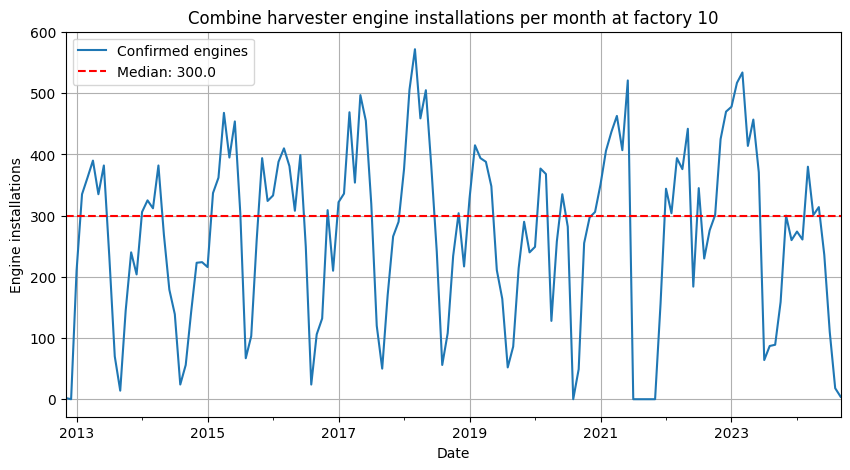

In [118]:
median_value = np.median(total_monthly)

total_monthly.plot(label='Confirmed engines', figsize=(10, 5))  # Passe die Größe nach Bedarf an
plt.title('Combine harvester engine installations per month at factory 10')
plt.axhline(y=median_value, color='r', linestyle='--', label=f'Median: {median_value}')
plt.xlabel('Date')
plt.ylabel('Engine installations')
plt.legend()
plt.grid(True)
plt.show()

In [103]:
# Gruppiere nach Jahr und Monat und zähle die unterschiedlichen Merkmalwerte für jeden Monat
monthly_unique_counts = gg.groupby(pd.Grouper(key='Datum', freq='M'))['Merkmalwert'].nunique()

# Ergebnis anzeigen
print(monthly_unique_counts)

Datum
2012-11-30     2
2012-12-31     0
2013-01-31    12
2013-02-28    14
2013-03-31    17
              ..
2024-05-31    41
2024-06-30    38
2024-07-31    28
2024-08-31    11
2024-09-30     4
Freq: ME, Name: Merkmalwert, Length: 143, dtype: int64


/var/folders/72/wtk5zn4j7qzfk4nhglnbm5vh0000gp/T/ipykernel_3374/325539457.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_unique_counts = gg.groupby(pd.Grouper(key='Datum', freq='M'))['Merkmalwert'].nunique()


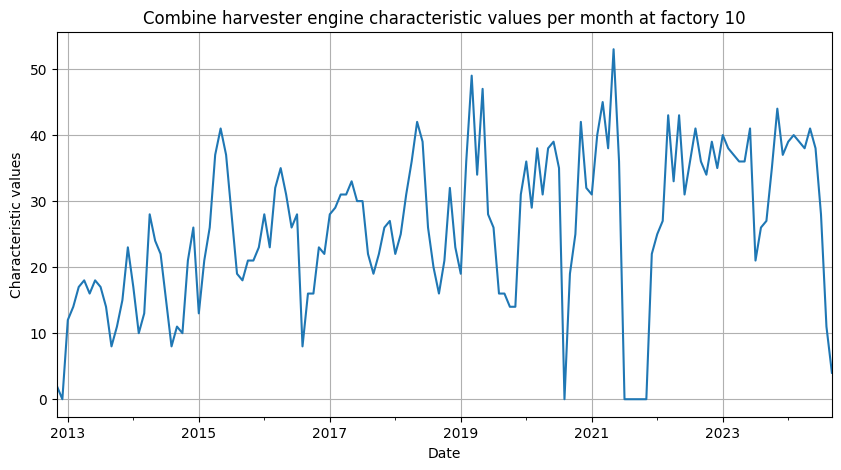

In [99]:
monthly_unique_counts.plot(figsize=(10, 5))  # Passe die Größe nach Bedarf an
plt.title('Combine harvester engine characteristic values per month at factory 10')
plt.xlabel('Date')
plt.ylabel('Characteristic values')
plt.grid(True)
plt.show()

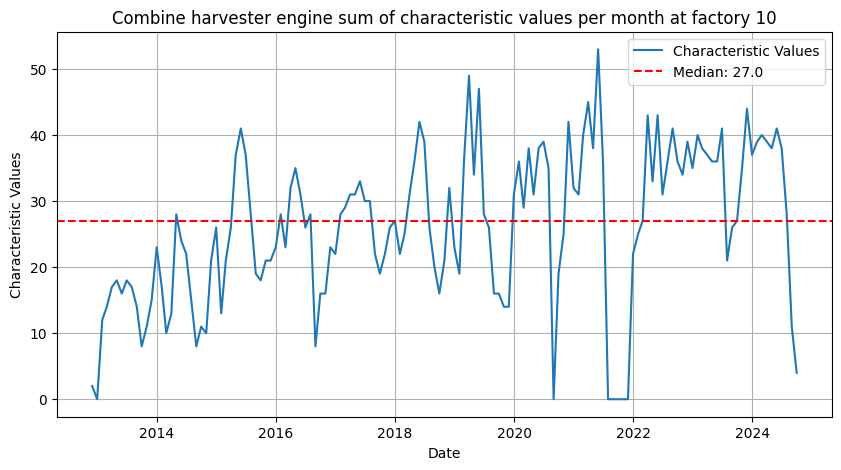

In [107]:
import matplotlib.pyplot as plt
import numpy as np

# Angenommen, 'data' ist die Series oder das Array, das deine Daten enthält.
# Beispiel: data = np.random.normal(size=100)

# Berechne den Median der Daten
median_value = np.median(monthly_unique_counts)

# Erstelle den Plot
plt.figure(figsize=(10, 5))
plt.plot(monthly_unique_counts, label='Characteristic Values')
plt.axhline(y=median_value, color='r', linestyle='--', label=f'Median: {median_value}')

# Füge Titel und Beschriftungen hinzu
plt.title('Combine harvester engine sum of characteristic values per month at factory 10')
plt.xlabel('Date')
plt.ylabel('Characteristic Values')
plt.grid(True)
# Zeige die Legende an
plt.legend()

# Zeige den Plot an
plt.show()


In [120]:
dfx1 = pd.read_excel('External_data/WtiOilSpot.XLSX')
dfx1

,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,NaN,Start,2014-01-01 00:00:00
1,NaN,End,2024-05-01 00:00:00
2,NaN,Frequency,M
3,NaN,Name,Crude Oil-WTI Spot Cushing U$/BBL
4,NaN,Code,CRUDOIL
...,...,...,...
126,NaN,2024-01-01 00:00:00,71.89
127,NaN,2024-02-01 00:00:00,74.36
128,NaN,2024-03-01 00:00:00,80.9
129,NaN,2024-04-01 00:00:00,84.54


In [121]:
# Zuerst die letzten beiden Spalten des Dataframes auswählen
dfx1_reduced = dfx1.iloc[:, -2:]

# Dann die Spalten umbenennen
dfx1_reduced.columns = ['Datum', 'Preis']

# Ergebnis anzeigen
print(dfx1_reduced)


                   Datum                              Preis
0                  Start                2014-01-01 00:00:00
1                    End                2024-05-01 00:00:00
2              Frequency                                  M
3                   Name  Crude Oil-WTI Spot Cushing U$/BBL
4                   Code                            CRUDOIL
..                   ...                                ...
126  2024-01-01 00:00:00                              71.89
127  2024-02-01 00:00:00                              74.36
128  2024-03-01 00:00:00                               80.9
129  2024-04-01 00:00:00                              84.54
130  2024-05-01 00:00:00                               80.7

[131 rows x 2 columns]


In [137]:
# Zuerst die letzten beiden Spalten des Dataframes auswählen
dfx1_reduced[6:]


,Datum,Preis
6,2014-01-01,98.04
7,2014-02-01,96.43
8,2014-03-01,104.92
9,2014-04-01,99.74
10,2014-05-01,99.42
...,...,...
126,2024-01-01,71.89
127,2024-02-01,74.36
128,2024-03-01,80.9
129,2024-04-01,84.54


In [134]:
import matplotlib.pyplot as plt

# Stellen Sie sicher, dass das Datum als datetime-Objekt erkannt wird, falls es nicht bereits so ist.
dfx1_reduced['Datum'] = pd.to_datetime(dfx1_reduced['Datum'])
dfx1_reduced['Preis'] = pd.to_numeric(dfx1_reduced['Preis'], errors='coerce')



# Erstellen eines Plots
plt.figure(figsize=(10, 5))  # Sie können die Größe des Plots an Ihre Bedürfnisse anpassen
plt.plot(dfx1_reduced['Datum'], dfx1_reduced['Preis'], label='WTI Öl-Spot Preis', color='blue', marker='o', linestyle='-')
plt.title('Zeitreihe der WTI Öl-Spot Preise')
plt.xlabel('Datum')
plt.ylabel('Preis in USD/Barrel')
plt.grid(True)
plt.legend()
plt.show()


/var/folders/72/wtk5zn4j7qzfk4nhglnbm5vh0000gp/T/ipykernel_3374/2340008470.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dfx1_reduced['Datum'] = pd.to_datetime(dfx1_reduced['Datum'])


DateParseError: Unknown datetime string format, unable to parse: Start, at position 0

In [152]:
unique_combinations = df.groupby(['CLAAS - Untertyp', 'Claas-Planungsland']).size().reset_index(name='Count')
print(unique_combinations)


      CLAAS - Untertyp Claas-Planungsland  Count
0                   10                 DZ     37
1                   10                 ET    497
2                   10                 IR    432
3                   10                 JP     94
4                   10                 KE     58
...                ...                ...    ...
1062               965                LTE    571
1063               965                LVF    220
1064               965                 NO    102
1065               965                 RO   1504
1066               965                 SE    398

[1067 rows x 3 columns]


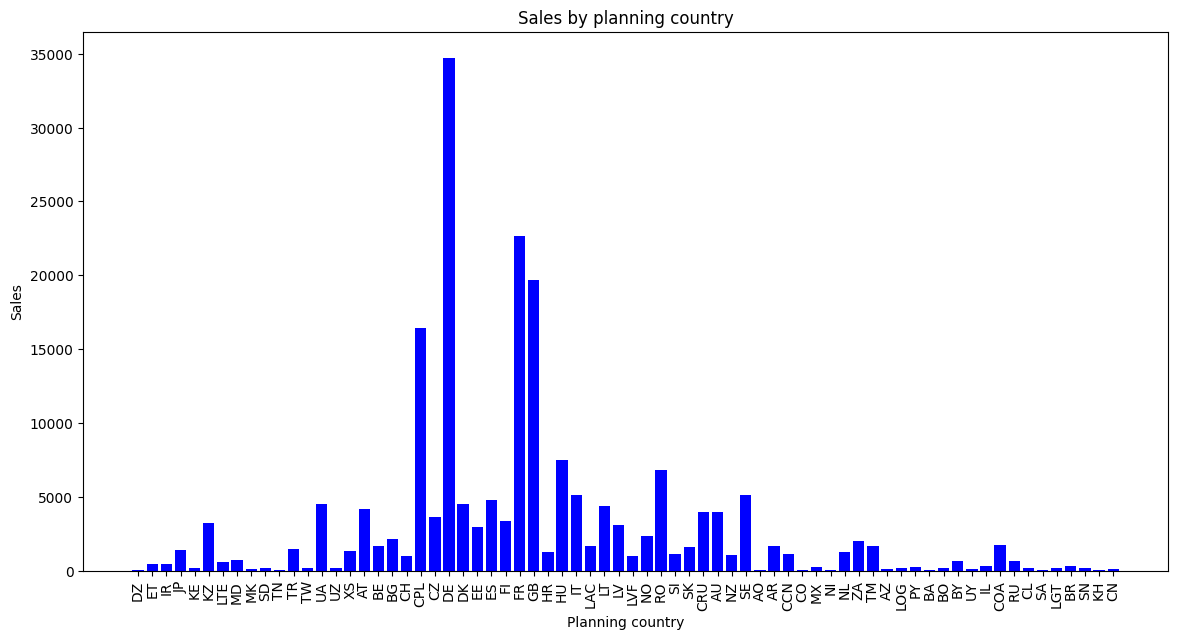

In [148]:
plt.figure(figsize=(14, 7))  # Größe des Plots anpassen
plt.bar(x=unique_combinations['Claas-Planungsland'], height=unique_combinations['Count'], color='blue')
plt.xlabel('Planning country')
plt.ylabel('Sales')
plt.title('Sales by planning country')
plt.xticks(rotation=90)  # Dreht die X-Achsen-Beschriftungen, falls notwendig
plt.show()

In [188]:
bb = unique_combinations[unique_combinations["Claas-Planungsland"] == "DE"]


In [190]:
ll = filtered_df_crop[filtered_df_crop["Geschäftsjahr"] == 2024]

In [191]:
ll.groupby('Merkmal')['Merkmalwert'].nunique()

Merkmal
B10    16
G02    30
N02    35
N05    21
N08    20
P02    56
Name: Merkmalwert, dtype: int64

In [189]:
ll.groupby(['CLAAS - Untertyp', 'Claas-Planungsland']).size().reset_index(name='Count')

,CLAAS - Untertyp,Claas-Planungsland,Count
0,23,CRU,31
1,25,CPL,5
2,33,AU,5
3,35,IT,5
4,113,PY,6
...,...,...,...
319,965,HU,7
320,965,LT,8
321,965,LTE,14
322,965,RO,59
